In [260]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('pokemon_alopez247.csv')

In [262]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [263]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [264]:
df.shape

(721, 23)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [266]:
df.nunique()

Number              721
Name                721
Type_1               18
Type_2               18
Total               183
HP                   94
Attack              100
Defense              97
Sp_Atk               94
Sp_Def               90
Speed               101
Generation            6
isLegendary           2
Color                10
hasGender             2
Pr_Male               7
Egg_Group_1          15
Egg_Group_2          13
hasMegaEvolution      2
Height_m             50
Weight_kg           398
Catch_Rate           33
Body_Style           14
dtype: int64

Categorical Variables: Type_1, Type_2, Generation, isLegendary, Color, hasGender, Pr_Male, Egg_Group_1, Egg_Group_2, hasMegaEvolution, Body_Style

In [267]:
df.groupby('Type_1')['isLegendary'].value_counts()

Type_1    isLegendary
Bug       False           63
Dark      False           26
          True             2
Dragon    False           17
          True             7
Electric  False           33
          True             3
Fairy     False           16
          True             1
Fighting  False           25
Fire      False           42
          True             5
Flying    False            2
          True             1
Ghost     False           22
          True             1
Grass     False           64
          True             2
Ground    False           28
          True             2
Ice       False           21
          True             2
Normal    False           91
          True             2
Poison    False           28
Psychic   False           39
          True             8
Rock      False           38
          True             3
Steel     False           18
          True             4
Water     False          102
          True             3
Name: isLegendary, dt

Psychic type has the highest legendary pokemon

In [268]:
df.groupby('Generation')['isLegendary'].value_counts()

Generation  isLegendary
1           False          147
            True             4
2           False           95
            True             5
3           False          125
            True            10
4           False           96
            True            11
5           False          146
            True            10
6           False           66
            True             6
Name: isLegendary, dtype: int64

Generation 4 has the highest legendary pokemon

In [269]:
df.groupby('Color')['isLegendary'].value_counts()

Color   isLegendary
Black   False           29
        True             3
Blue    False          125
        True             9
Brown   False          105
        True             5
Green   False           74
        True             5
Grey    False           65
        True             4
Pink    False           39
        True             2
Purple  False           62
        True             3
Red     False           70
        True             5
White   False           48
        True             4
Yellow  False           58
        True             6
Name: isLegendary, dtype: int64

Blue colored pokemon turns out to be more legendary

In [270]:
df.groupby('hasGender')['isLegendary'].value_counts()

hasGender  isLegendary
False      True            40
           False           37
True       False          638
           True             6
Name: isLegendary, dtype: int64

Most legendary pokemon do not have gender

In [271]:
df.groupby('Egg_Group_1')['isLegendary'].value_counts()

Egg_Group_1   isLegendary
Amorphous     False           41
Bug           False           66
Ditto         False            1
Dragon        False           10
Fairy         False           30
Field         False          169
Flying        False           44
Grass         False           27
Human-Like    False           37
Mineral       False           46
Monster       False           74
Undiscovered  True            46
              False           27
Water_1       False           74
Water_2       False           15
Water_3       False           14
Name: isLegendary, dtype: int64

Only the undiscovered egg group is legendary

In [272]:
df.groupby('Egg_Group_2')['isLegendary'].value_counts()

Egg_Group_2  isLegendary
Amorphous    False           8
Bug          False           2
Dragon       False          35
Fairy        False          17
Field        False          31
Flying       False           6
Grass        False          32
Human-Like   False          15
Mineral      False           8
Monster      False           1
Water_1      False          13
Water_2      False           8
Water_3      False          15
Name: isLegendary, dtype: int64

In [273]:
df.groupby('hasMegaEvolution')['isLegendary'].value_counts()

hasMegaEvolution  isLegendary
False             False          634
                  True            41
True              False           41
                  True             5
Name: isLegendary, dtype: int64

Pokemon's that do not have mega evolution have the most number of legendary count

In [274]:
df.groupby('Body_Style')['isLegendary'].value_counts()

Body_Style        isLegendary
bipedal_tailed    False          150
                  True             8
bipedal_tailless  False          101
                  True             8
four_wings        False           18
head_arms         False           35
                  True             4
head_base         False           30
head_legs         False           17
head_only         False           33
                  True             1
insectoid         False           30
multiple_bodies   False           15
quadruped         False          123
                  True            12
serpentine_body   False           26
                  True             3
several_limbs     False           13
two_wings         False           54
                  True             9
with_fins         False           30
                  True             1
Name: isLegendary, dtype: int64

The one with quadruped is most likely to be the legendary pokemon

In [275]:
df.groupby('isLegendary')['Total'].sum().reset_index()

,isLegendary,Total
0,False,272809
1,True,28530


There are more non-legendary pokemon as compared to legendary

In [276]:
df.groupby('isLegendary')['HP'].sum().reset_index()

,isLegendary,HP
0,False,44978
1,True,4324


Non-legendary pokemon have the highest HP(Hit points)

In [277]:
df.groupby('isLegendary')['Attack'].sum().reset_index()

,isLegendary,Attack
0,False,49089
1,True,4996


Non legendary pokemon have highest attack power -- This is because of the presence of uneven distribution of legendary and non-legendary pokemon

In [278]:
df.groupby('isLegendary')['Defense'].sum().reset_index()

,isLegendary,Defense
0,False,46380
1,True,4673


Non legendary pokemon have more defense power

In [279]:
df.groupby('isLegendary')['Sp_Atk'].sum().reset_index()

,isLegendary,Sp_Atk
0,False,44321
1,True,5239


Non legendary pokemon have highest special attack power

In [280]:
df.groupby('isLegendary')['Sp_Def'].sum().reset_index()

,isLegendary,Sp_Def
0,False,45058
1,True,4901


Non legendary pokemon have highest special defense power

In [281]:
df.groupby('isLegendary')['Speed'].mean().reset_index()

,isLegendary,Speed
0,False,63.678519
1,True,95.586957


Legendary pokemon has highest average speed

In [282]:
df.groupby('isLegendary')['Height_m'].sum().reset_index()

,isLegendary,Height_m
0,False,712.85
1,True,112.68


Non legendary pokemon are taller

In [283]:
df.groupby('isLegendary')['Weight_kg'].sum().reset_index()

,isLegendary,Weight_kg
0,False,31650.9
1,True,9282.7


Non legendary pokemon are heavier

In [284]:
df.groupby('isLegendary')['Catch_Rate'].sum().reset_index()

,isLegendary,Catch_Rate
0,False,71972
1,True,306


Catch rate of non-legendary pokemon is higher

In [285]:
(df.isna().sum()/df.shape[0])*100

Number               0.000000
Name                 0.000000
Type_1               0.000000
Type_2              51.456311
Total                0.000000
HP                   0.000000
Attack               0.000000
Defense              0.000000
Sp_Atk               0.000000
Sp_Def               0.000000
Speed                0.000000
Generation           0.000000
isLegendary          0.000000
Color                0.000000
hasGender            0.000000
Pr_Male             10.679612
Egg_Group_1          0.000000
Egg_Group_2         73.509015
hasMegaEvolution     0.000000
Height_m             0.000000
Weight_kg            0.000000
Catch_Rate           0.000000
Body_Style           0.000000
dtype: float64

In [286]:
df.Type_2.value_counts(normalize=True) #normalize displays the proportion of total records

Flying      0.248571
Poison      0.088571
Ground      0.085714
Psychic     0.077143
Fighting    0.054286
Steel       0.054286
Fairy       0.051429
Grass       0.051429
Dark        0.045714
Dragon      0.040000
Rock        0.040000
Water       0.037143
Ghost       0.034286
Ice         0.028571
Fire        0.025714
Electric    0.017143
Normal      0.011429
Bug         0.008571
Name: Type_2, dtype: float64

In [287]:
#Flying pokemon occured more and hence we'll fill in the missing values with 'Flying'
df.Type_2.fillna('Flying', inplace=True)

In [288]:
df.Pr_Male.value_counts(normalize=True)

0.500    0.711180
0.875    0.156832
0.000    0.035714
0.250    0.034161
1.000    0.029503
0.750    0.029503
0.125    0.003106
Name: Pr_Male, dtype: float64

In [289]:
df.Egg_Group_2.value_counts(normalize=True)

Dragon        0.183246
Grass         0.167539
Field         0.162304
Fairy         0.089005
Water_3       0.078534
Human-Like    0.078534
Water_1       0.068063
Water_2       0.041885
Amorphous     0.041885
Mineral       0.041885
Flying        0.031414
Bug           0.010471
Monster       0.005236
Name: Egg_Group_2, dtype: float64

In [290]:
#Dragon has the highest frequency and hence we'll fill in the missing with that
df.Egg_Group_2.fillna('Dragon', inplace=True)

In [291]:
#Since Pr_male just accounts to 10% of the missing values, we can drop it
df.drop(['Pr_Male'], axis=1, inplace =True)

In [292]:
df.isna().sum()

Number              0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

To check the dependence of categorical variable with the target variables

In [293]:
#To check the dependence of all categorical variables
import scipy.stats as stats
categorical_variables = df[['Type_1', 'Type_2', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Egg_Group_1', 
                            'Egg_Group_2', 'hasMegaEvolution', 'Body_Style']]
for i in categorical_variables:
    crosstab = pd.crosstab(df['isLegendary'] , df[i])
    #print(crosstab)
    c = stats.chi2_contingency(crosstab)
    print('Chi-square value {} p-value {}'.format(c[0],c[1]))

Chi-square value 54.785475309805435 p-value 7.4174776409724115e-06
Chi-square value 20.755808112964527 p-value 0.23740396027972302
Chi-square value 7.261952887900006 p-value 0.2018760597912861
Chi-square value 704.3551290347759 p-value 3.3779785655929324e-155
Chi-square value 2.780445989691305 p-value 0.972367200084747
Chi-square value 291.2077264850776 p-value 2.7127233131930227e-65
Chi-square value 436.1556164383562 p-value 2.9950665687240253e-84
Chi-square value 13.566426745329402 p-value 0.3292474514267514
Chi-square value 0.9523907802852912 p-value 0.329111490484477
Chi-square value 19.957516582576176 p-value 0.09627464583181722


Since all the categorical variables are dependent considering the p-value which is greater than 0.05 in Chi square test of independence, we take the continuous variables that are suitable to predict the target variable.

In [294]:
#To check the dependence of continous variables
co = df[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Weight_kg','Height_m','Catch_Rate']]
corr = co.corr()
corr

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.535966,0.526813,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.431320,0.442872,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.469395,0.408590,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.476983,0.354205,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.285048,0.330579,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.328645,0.313196,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.108637,0.224617,-0.410557
Weight_kg,0.535966,0.431320,0.469395,0.476983,0.285048,0.328645,0.108637,1.000000,0.661342,-0.367798
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,0.661342,1.000000,-0.382862
Catch_Rate,-0.738280,-0.478725,-0.525106,-0.436558,-0.539114,-0.513014,-0.410557,-0.367798,-0.382862,1.000000


Total, Attack, Weight and Height should be removed, as they have significant correlation among the variables

In [295]:
df_1 = pd.concat([df['HP'],df['Defense'],df['Speed']
                 ,df['isLegendary']], axis=1)

In [296]:
df_1 = pd.get_dummies(data=df_1, drop_first=True)

In [297]:
df_1.isLegendary.astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
716    1
717    1
718    1
719    1
720    1
Name: isLegendary, Length: 721, dtype: int32

In [298]:
df_1['isLegendary'] = df_1.isLegendary.astype(int)

In [299]:
df_1

,HP,Defense,Speed,isLegendary
0,45,49,45,0
1,60,63,60,0
2,80,83,80,0
3,39,43,65,0
4,58,58,80,0
...,...,...,...,...
716,126,95,99,1
717,108,121,95,1
718,50,150,50,1
719,80,60,70,1


In [300]:
X = df_1[['HP','Defense','Speed']]
y = df_1['isLegendary']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [302]:
clf = LogisticRegression()

In [303]:
clf.fit(X_train, y_train)

LogisticRegression()

In [304]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

In [305]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba

array([2.47584991e-02, 3.23157307e-05, 4.33422163e-02, 5.92422368e-05,
       6.28238647e-03, 8.34359075e-04, 1.44377408e-03, 1.94876600e-06,
       3.36044876e-02, 4.17936858e-04, 9.90820687e-03, 5.35507050e-05,
       2.50130236e-01, 1.00925807e-03, 7.22979419e-05, 3.07770008e-02,
       1.42840244e-04, 4.90340011e-05, 1.06333967e-02, 9.01142572e-01,
       1.23625370e-02, 1.01506333e-02, 3.58171803e-03, 1.69715481e-01,
       9.39967673e-04, 1.78059983e-02, 1.99758010e-05, 1.82833898e-05,
       1.17587078e-04, 3.22232303e-03, 4.47592947e-02, 3.05990417e-03,
       1.29004387e-01, 1.95711004e-04, 5.20794658e-05, 3.84788595e-03,
       7.47723049e-05, 3.57951082e-02, 1.81293172e-02, 8.44890984e-05,
       4.44742761e-02, 1.56296284e-02, 1.83007059e-02, 3.14275738e-05,
       3.11814004e-02, 2.58984511e-02, 7.56075963e-02, 2.01053094e-03,
       7.97052017e-06, 1.03288471e-04, 1.37762805e-05, 3.59709186e-04,
       9.03799171e-05, 4.13559764e-05, 3.38256094e-04, 1.04524759e-02,
      

In [306]:
clf.score(X_train, y_train)

0.9459876543209876

In [307]:
clf.score(X_test, y_test)

0.9726027397260274

# Evaluation Metrics

1. Confusion Matrix

In [308]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [309]:
confusion_matrix(y_test, pred)

array([[69,  0],
       [ 2,  2]], dtype=int64)

69 - True Negative, 0-FP , 2-FN, 2-True Positive

In [310]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

2. Accuracy

In [311]:
acc = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy: ", acc)

Accuracy:  0.9726027397260274


3. Precision

In [312]:
pre = tp/(tp+fp)
print("Precision: ",pre)

Precision:  1.0


4. Recall or Sensitivity 

In [313]:
re = tp/(tp+fn)
print("Recall: ", re)

Recall:  0.5


5. Specificity

In [314]:
sp = tn/(tn+fp)
print("Specificity: ",sp)

Specificity:  1.0


6. Misclassification Rate

In [315]:
print("Misclassification Rate: ",np.mean((pred != y_test))*100)

Misclassification Rate:  2.73972602739726


7. ROC curve

In [316]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

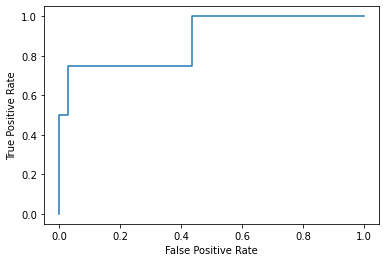

In [317]:
#Roc curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

8. AUC(Area Under Curve)

In [318]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
print(auc)

0.8840579710144928
